# Сборный проект
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Задачи проекта
### [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)

### [Шаг 2. Подготовьте данные](#step2)

 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### [Шаг 3. Проведите исследовательский анализ данных](#step3)
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### [Шаг 4. Составьте портрет пользователя каждого региона](#step4)
Определите для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж;
 - Самые популярные жанры (топ-5). Поясните разницу;
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
### [Шаг 5. Проверьте гипотезы](#step5)
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### [Шаг 6. Напишите общий вывод](#step6)

# Этапы выполнения проекта

## Шаг 1. Откроем файл с данными и изучим общую информацию. <a id='step1'></a>

In [1]:
import pandas as pd
import calendar
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
df.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1324,Tony Hawk's American Wasteland (Weekly america...,PS2,2005.0,Sports,1.38,0.05,0.0,0.02,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<p>Заметим, что названия столбцов - с большой буквы. Заменим это на этапе обработке.</p>
<p>Кроме этого есть пустые значения в столбцах Name, Genre, Year_of_Release, Critical_Score, User_Score, Rating. </p>
<p>Столбец с годом релиза лучше всего привести к соответствующему типу данных.</p>
<p>Столбец с пользовательской оценкой нужно перевести в формат float.</p>

In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Посмотрим на уникальные значения в некоторых столбцах.

In [9]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [11]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [12]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Проверим количество дубликатов:

In [13]:
df.duplicated().sum()

0

Посмотрим какие данные хранятся в столбцах.

In [14]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [15]:
df['Name'].value_counts()

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
FIFA 14                                  9
                                        ..
Crayon Shin-Chan: Arashi o Yobu Enji     1
Thoroughbred Breeder II                  1
Klax                                     1
Shining Soul II                          1
A.C.E.: Another Century's Episode 2      1
Name: Name, Length: 11559, dtype: int64

### Вывод
После ознакомления с датасетом обнаружено следующее:
 - названия столбцов начинаются с большой буквы
 - имеются пустые значения в столбцах Name, Genre, Year_of_Release, Critical_Score, User_Score, Rating
 - столбец с годом релиза и пользовательской оценкой имеют несоотвествущие форматы
 

На этапе обработки данных эти ошибки будут исправлены.


## Шаг 2. Обработка данных. <a id='step2'></a>

Приведем названия столбцов в нижний регистр.

In [16]:
df.columns = map(str.lower, df.columns)

In [17]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуем данные в нужны типы. Сначала разберемся с годом выпуска игр. Поскольку стандартная операция по переводу переменной в формат даты не дает нам нужного результата (при отборе года из строки в формате 2020-10-20 нам выдается результат 2020.0), то было решено заполнить пустые значения уникальным значеним 1970 годом, перевести в формат и int и уже после использоваться функцию to_datetime. 
Также заметим, что часть пустых значений в этом столбце можно заполнить исходя из заполненных данных в других строках, относящийся к одной и той же игре.

In [18]:
x = df[df['year_of_release'].isnull()]

In [19]:
lookup2 = df[['name', 'year_of_release']].groupby('name').first()['year_of_release']
nan_mask2 = df['year_of_release'].isnull()
df['year_of_release'].loc[nan_mask2] = df.loc[nan_mask2].apply(lambda x: lookup2[x['name']], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16569 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
df['year_of_release'] = df['year_of_release'].fillna(1970)
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release'] = pd.DatetimeIndex(df['year_of_release']).year

In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Разберемся со столбцом Пользовательская оценка.

In [23]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
0.9       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Как видно, в данном столбце чаще всего встречается значение tbd. Данное значение подразумевает, что рейтинг еще не определен пользователями. Поэтому я предлагаю его заменить на -1 и заменить на формат float.

In [24]:
df['user_score']=='tbd'
df.loc[df['user_score'] == "tbd",'user_score'] = -1
df['user_score'] = df['user_score'].astype(float)

Посмотрим на пустые значения в столбце Name

In [25]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные не несут никакой информации. Столбец Жанр у них также пустой. Их можно спокойно удалить, ненанеся вред результатам. 

In [26]:
df = df.dropna(subset=['name']).reset_index(drop=True)

Проверим теперь, какие типы данных у столбцов.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [28]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] +df['jp_sales'] + df['other_sales']


In [29]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Рассмотрим, можем ли мы как-то обработать пустные значения в рейтинге. 

In [30]:
df.loc[df['name'] == "FIFA 14"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
1752,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16
4698,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
4808,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4984,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38
6870,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN,0.23
7874,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E,0.19


In [31]:
df.loc[df['name'] == "Ratatouille"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1597,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,NaN,NaN,1.25
2441,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3068,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3901,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3947,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6397,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,-1.0,E,0.27
7680,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,-1.0,E,0.19
9014,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14512,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E,0.02


Заметили, что столбце rating можно заполнить на основе других строк. 

In [32]:
lookup = df[['name', 'rating']].groupby('name').first()['rating']
nan_mask = df['rating'].isnull()
df['rating'].loc[nan_mask] = df.loc[nan_mask].apply(lambda x: lookup[x['name']], axis=1)

Проверим, как сработала замена:

In [33]:
df.loc[df['name'] == "Ratatouille"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1597,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,NaN,E,1.25
2441,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3068,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3901,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3947,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6397,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,-1.0,E,0.27
7680,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,-1.0,E,0.19
9014,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14512,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E,0.02


In [34]:
df.loc[df['name'] == "FIFA 14"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E,4.22
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E,3.01
1752,FIFA 14,XOne,2013,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E,1.16
4698,FIFA 14,PSV,2013,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E,0.41
4808,FIFA 14,PC,2013,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E,0.40
4984,FIFA 14,Wii,2013,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E,0.38
6870,FIFA 14,3DS,2013,Sports,0.00,0.22,0.00,0.01,NaN,NaN,E,0.23
7874,FIFA 14,PSP,2013,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E,0.19


In [35]:
df.loc[df['name'] == "Pokemon Red/Pokemon Blue"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN,31.38


Вроде все ок.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float64
rating             10386 non-null object
total_sales        16713 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод
В итоговом датафрейме у нас имеется четыре столбца с пустыми значениями: год выпуска, оценка критиков, оценка пользователей и рейтинг. Основная причина их отсутствия скорей всего связана с выгрузкой данных (часть информации не попадает в итоговый датасет, либо заведомо отсуствует).
На основе данных из других строк были заполнены значения в столбцах:
 - rating (увеличилось число заполненных строк с 9949 до 10386)
 - year_of_release (увеличилось число заполненных строк с 16446 до 16569).
Остальные значения в данных столбцах заполнить можно только вручную, поэтому заполнять их мы не будем.

Прочие пустые значения в столбцах с оценками можно заполнить средними показателями, исходя из средних оценок по жанрам и платформам. Но целесообразности в этом скорей всего нет, поскольку слишком сильный разброс значений, которые не дадут четкой картины.

## Шаг 3. Исследовательский анализ данных. <a id='step3'></a>

### Посмотрим, сколько игр выпускалось в разные годы.

In [37]:
df.groupby(['year_of_release']).agg('count').reset_index()

,year_of_release,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,1970,146,146,146,146,146,146,146,62,80,81,146
1,1980,9,9,9,9,9,9,9,0,0,1,9
2,1981,46,46,46,46,46,46,46,0,0,1,46
3,1982,36,36,36,36,36,36,36,0,0,1,36
4,1983,17,17,17,17,17,17,17,0,0,0,17
5,1984,14,14,14,14,14,14,14,0,0,0,14
6,1985,14,14,14,14,14,14,14,1,1,2,14
7,1986,21,21,21,21,21,21,21,0,0,0,21
8,1987,16,16,16,16,16,16,16,0,0,0,16
9,1988,15,15,15,15,15,15,15,1,1,1,15


Text(0.5, 1.0, 'Выпуск игр по годам')

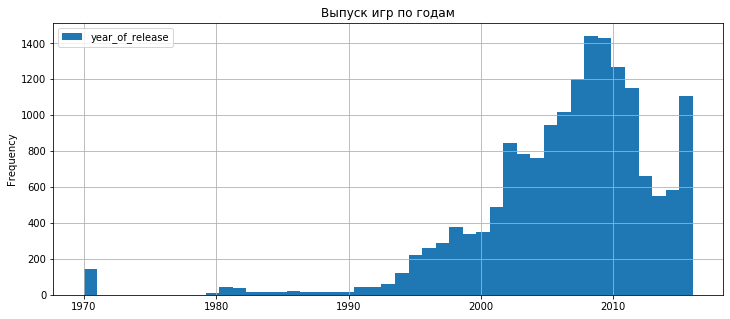

In [38]:
df['year_of_release'].plot(kind='hist',bins=45,grid=True,legend=True,figsize=(12, 5))
plt.title('Выпуск игр по годам')

Кол-во выпущенных игр до 2000 года очень мало. В 2008-2009 был зафиксирован максимум, и после чего произошло падение. 

 ### Посмотрим, как менялись продажи по платформам.

In [39]:
df_platform = df.query('year_of_release != 1970').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()

In [40]:
df_platform.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

 Больше всего продаж игр было совершено на платформах PS2, X360, PS3,Wii,DS,PS. Рассмотрим их более подробно. 


In [41]:
df_platform

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
240,XB,2008,0.18
241,XOne,2013,18.96
242,XOne,2014,54.07
243,XOne,2015,60.14


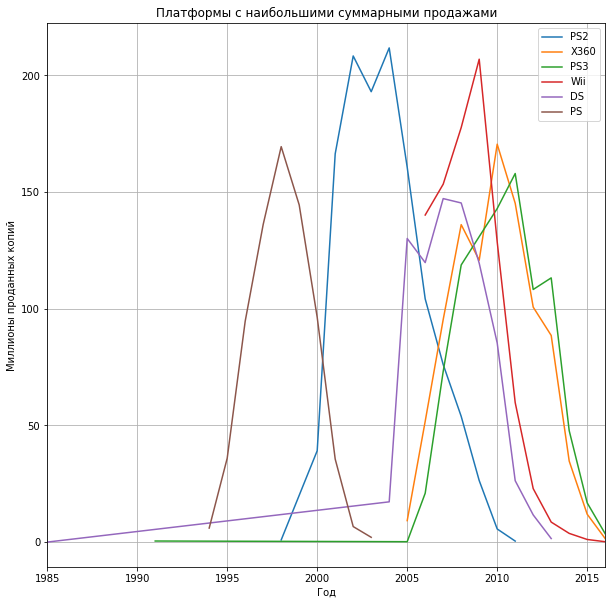

In [42]:
fig, ax = plt.subplots()
(df
        .query('platform =="PS2" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS2')
)

(df
        .query('platform =="X360" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='X360')
        
)
(df
        .query('platform =="PS3" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS3')
        
)
(df
        .query('platform =="Wii" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='Wii')
        
)
(df
        .query('platform =="DS" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='DS')
        
)
(df
        .query('platform =="PS" and year_of_release != 1970')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS')
        
)
ax.legend(('PS2', 'X360','PS3','Wii','DS','PS'))
plt.title('Платформы с наибольшими суммарными продажами')
ax.set_xlabel("Год")
ax.set_ylabel("Миллионы проданных копий")
plt.show()

In [43]:
df_platform.query('platform =="PS"')

,platform,year_of_release,total_sales
124,PS,1994,6.03
125,PS,1995,35.96
126,PS,1996,94.70
127,PS,1997,136.17
128,PS,1998,169.49
129,PS,1999,144.53
130,PS,2000,96.37
131,PS,2001,35.59
132,PS,2002,6.67
133,PS,2003,2.07


In [44]:
df_platform.query('platform =="X360"')

,platform,year_of_release,total_sales
220,X360,2005,9.22
221,X360,2006,51.79
222,X360,2007,95.41
223,X360,2008,136.07
224,X360,2009,120.82
225,X360,2010,170.55
226,X360,2011,145.23
227,X360,2012,100.72
228,X360,2013,88.58
229,X360,2014,34.74


In [45]:
df_platform.query('platform =="DS"')

,platform,year_of_release,total_sales
28,DS,1985,0.02
29,DS,2004,17.27
30,DS,2005,130.14
31,DS,2006,119.81
32,DS,2007,147.23
33,DS,2008,145.36
34,DS,2009,119.56
35,DS,2010,85.35
36,DS,2011,26.33
37,DS,2012,11.67


Примерно за 4-5 лет платформы набирают максимальную популярность, а потом доля продаж с них падает. 

 ### Возьмем данные за соответствующий актуальный период

Рассмотрим продажи по платформам за период с 2010 по 2016 год для построения примерного прогноза. Определим, какие платформы лидируют по продажам, растут или падают.

In [46]:
df_platform_new = df.query('year_of_release >= 2013').pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()

<b>UPD: <font color='green'>Да, пожалуй, так будет идеально.

In [47]:
df_platform_new = df_platform_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [48]:
df_platform_new

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       40.06
PSV      32.99
Wii      13.66
PSP       3.74
DS        1.54
Name: total_sales, dtype: float64

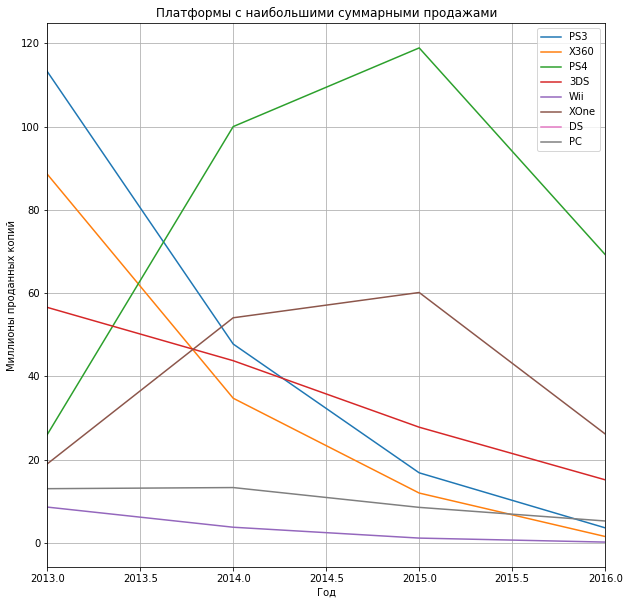

In [49]:
fig, ax = plt.subplots()
(df
        .query('platform =="PS3" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS2')
)

(df
        .query('platform =="X360" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='X360')
        
)
(df
        .query('platform =="PS4" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS3')
        
)
(df
        .query('platform =="3DS" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='Wii')
        
)
(df
        .query('platform =="Wii" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='DS')
        
)
(df
        .query('platform =="XOne" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS')
        
)
(df
        .query('platform =="DS" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS')
        
)
(df
        .query('platform =="PC" and year_of_release >= 2013')
        .groupby('year_of_release').agg({'total_sales':'sum'})
        .plot(grid=True, legend=True, figsize=(10, 10), ax = ax, rot=0, label='PS')
        
)
ax.legend(('PS3', 'X360','PS4','3DS','Wii','XOne','DS','PC'))
plt.title('Платформы с наибольшими суммарными продажами')
ax.set_xlabel("Год")
ax.set_ylabel("Миллионы проданных копий")
plt.show()

График говорит нам от том, чтообъем продаж по большинству платформ стремительно падает, например: X360, PS3, Wii, DS. Некоторые же наоборот, начинают свой рост - PS4,XOne, и поэтому их можно называть прибыльными. 

 ### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0, 5)

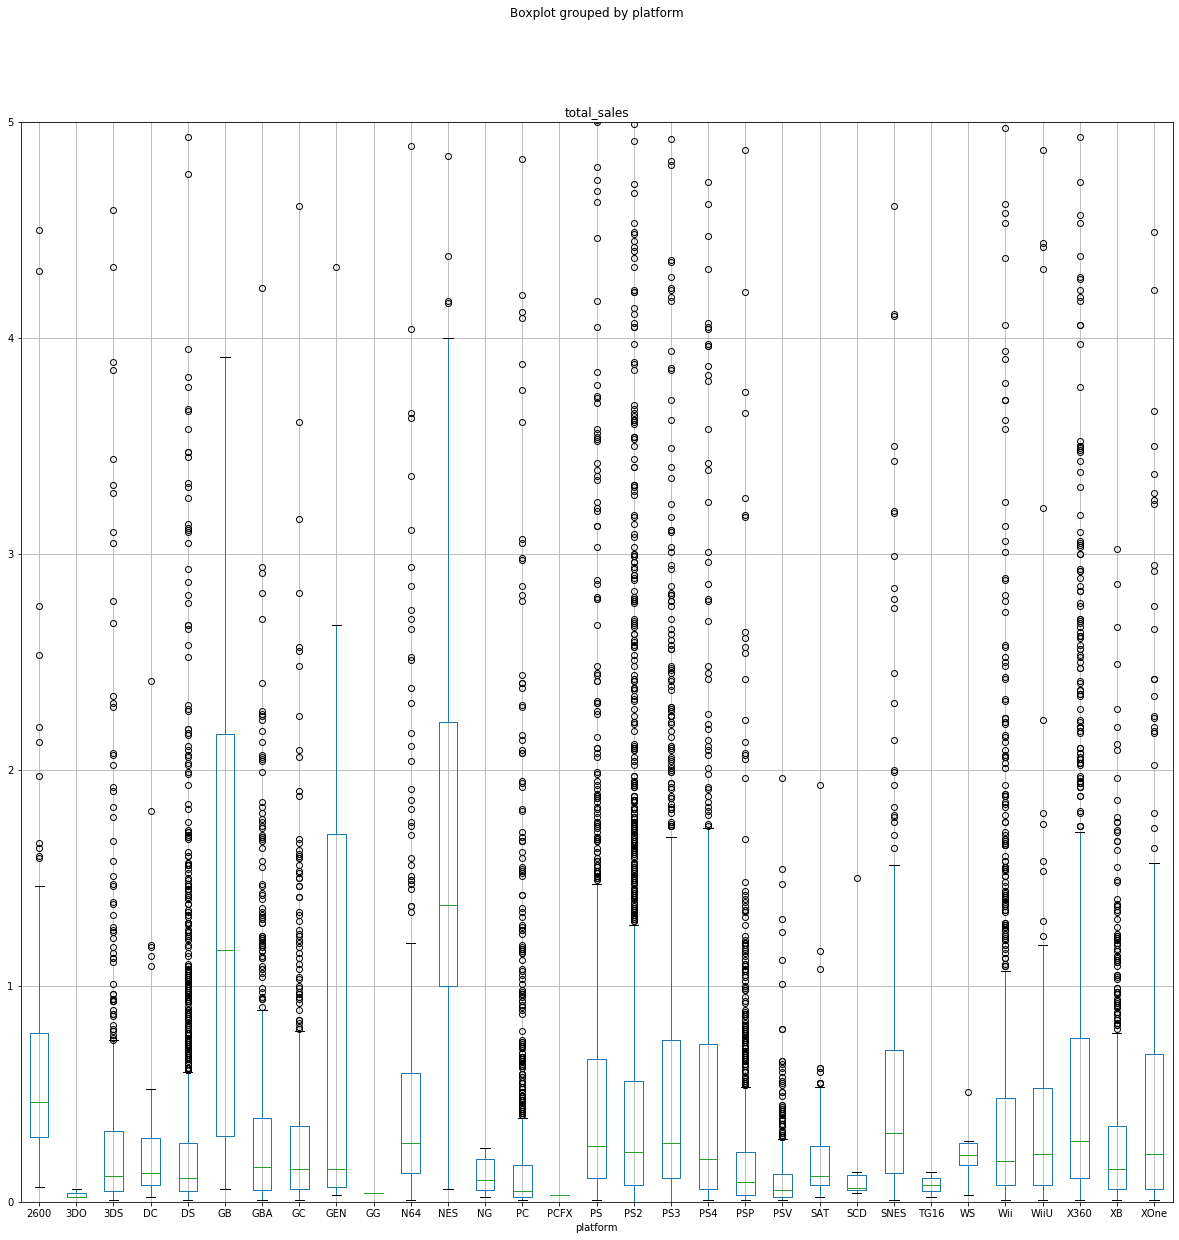

In [50]:
df.boxplot('total_sales', by='platform',figsize=(20,20))
plt.ylim(0, 5)

Больше всего объема продаж с одной игры приходится на следующие платформы:
 - GB
 - NES
 Следом идут:
 - 2600
 - N64
 - платформы PS
 - SNES
 На многих платформах замечены выбросы данных, что вполне логично, поскольку к некоторым играм может быть повышенный спрос.
 К таким платформам можно отнести:
 - DS
 - PC
 - платформы PS
 - PSP
 - Wii
 - Xbox
 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков
В качестве платформы выберем PS3

Text(0, 0.5, 'Продажи, млн. копий')

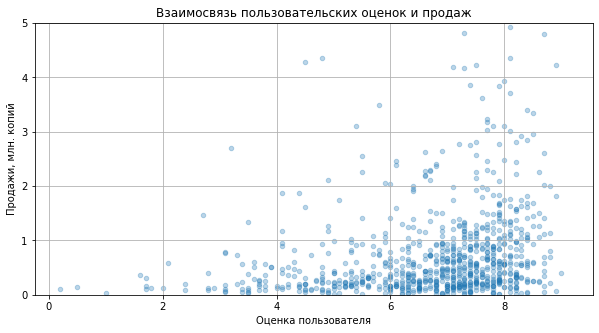

In [51]:
df.query('platform=="PS3" and user_score!= -1').plot(x='user_score', y='total_sales', kind='scatter',grid=True, figsize=(10,5), alpha=0.3) 
plt.ylim(0, 5)
plt.title('Взаимосвязь пользовательских оценок и продаж')
plt.xlabel("Оценка пользователя")
plt.ylabel("Продажи, млн. копий")


Text(0, 0.5, 'Продажи, млн. копий')

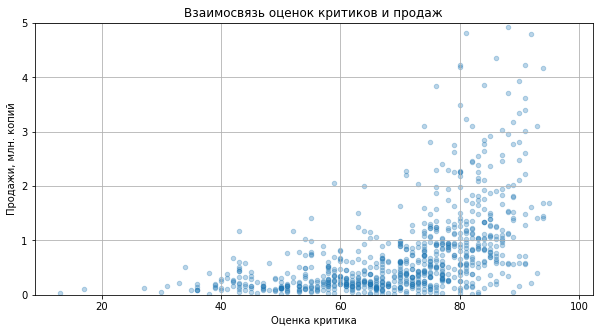

In [52]:
df.query('platform=="PS3"').plot(x='critic_score', y='total_sales', kind='scatter',grid=True, figsize=(10,5), alpha=0.3) 
plt.ylim(0, 5)
plt.title('Взаимосвязь оценок критиков и продаж')
plt.xlabel("Оценка критика")
plt.ylabel("Продажи, млн. копий")

Рассмотрим к-эты корреляции:

In [53]:
print(df['critic_score'].corr(df['total_sales']))
print(df['user_score'].corr(df['total_sales']))

0.24550668717736324
0.1639589600101783


In [54]:
df_ps3 = df.query('platform=="PS3" and user_score!= -1')

In [55]:
print(df_ps3['critic_score'].corr(df_ps3['total_sales']))
print(df_ps3['user_score'].corr(df_ps3['total_sales']))

0.42803299754469104
0.12669133936341712


In [56]:
df_ps4 = df.query('platform=="PS4" and user_score!= -1')

In [57]:
print(df_ps4['critic_score'].corr(df_ps4['total_sales']))
print(df_ps4['user_score'].corr(df_ps4['total_sales']))

0.4064685741971657
-0.031957110204556424


Сказать, что зависимость отсутсвует на популярной платформе PS3 - мы не можем. На графиках видно, что чем выше оценка пользователя/критика, тем больше приходится продаж.
Если рассматривать к-т корреляции, то можно сделать вывод, что оценки критиков влиют в бОльшей степени на продажи, нежели оценки пользователей. 
Сравнивая к-эты корреляции по всем платформам, пришли к выводу, что общая зависимость ниже, чем по популярным платформам.

### Посмотрим на общее распределение игр по жанрам

In [58]:
df_genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [59]:
df_genre_sales

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64

In [60]:
df.groupby(['genre']).agg('count').reset_index()

,genre,name,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Action,3369,3369,3369,3369,3369,3369,3369,1890,2206,2320,3369
1,Adventure,1303,1303,1303,1303,1303,1303,1303,323,459,474,1303
2,Fighting,849,849,849,849,849,849,849,409,438,459,849
3,Misc,1750,1750,1750,1750,1750,1750,1750,523,888,916,1750
4,Platform,888,888,888,888,888,888,888,497,567,595,888
5,Puzzle,580,580,580,580,580,580,580,224,339,351,580
6,Racing,1249,1249,1249,1249,1249,1249,1249,742,874,909,1249
7,Role-Playing,1498,1498,1498,1498,1498,1498,1498,737,773,835,1498
8,Shooter,1323,1323,1323,1323,1323,1323,1323,944,1023,1034,1323
9,Simulation,873,873,873,873,873,873,873,352,581,586,873


In [61]:
df_genre = df.groupby(['genre']).agg('count').reset_index()

In [62]:
df_genre = df_genre[['genre','name']]

In [63]:
df_genre = df_genre.merge(df_genre_sales, on='genre') 
df_genre.columns =['genre','count','total_sales']

In [64]:
df_genre

,genre,count,total_sales
0,Action,3369,1744.17
1,Adventure,1303,237.59
2,Fighting,849,447.53
3,Misc,1750,802.51
4,Platform,888,827.77
5,Puzzle,580,242.57
6,Racing,1249,728.67
7,Role-Playing,1498,934.56
8,Shooter,1323,1052.45
9,Simulation,873,389.97


In [65]:
df_genre['sale_per_game'] = df_genre['total_sales'] / df_genre['count']

In [66]:
df_genre.sort_values(by='sale_per_game',ascending=False)

,genre,count,total_sales,sale_per_game
4,Platform,888,827.77,0.932173
8,Shooter,1323,1052.45,0.795503
7,Role-Playing,1498,934.56,0.623872
6,Racing,1249,728.67,0.583403
10,Sports,2348,1331.27,0.566980
2,Fighting,849,447.53,0.527126
0,Action,3369,1744.17,0.517711
3,Misc,1750,802.51,0.458577
9,Simulation,873,389.97,0.446701
5,Puzzle,580,242.57,0.418224


Text(0.5, 1.0, 'Объем продаж по жанрам')

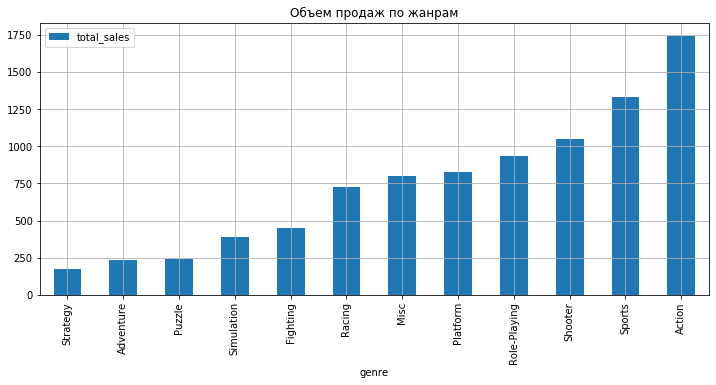

In [67]:
df_genre.sort_values(by='total_sales',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='total_sales')
plt.title('Объем продаж по жанрам')

Text(0.5, 1.0, 'Количество игр по жанрам')

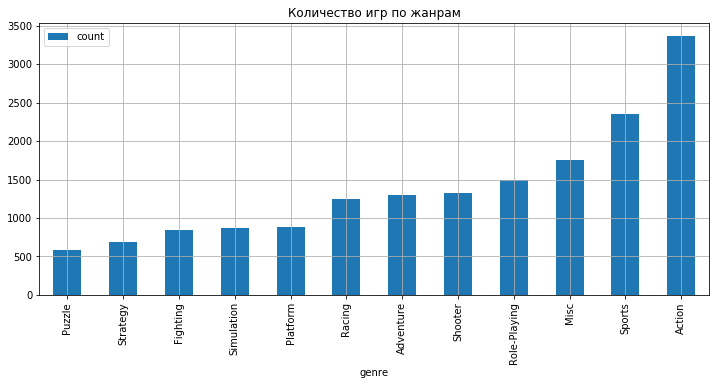

In [68]:
df_genre.sort_values(by='count',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='count')
plt.title('Количество игр по жанрам')

Text(0.5, 1.0, 'Средний объем продаж одной игры в разрезе жанров ')

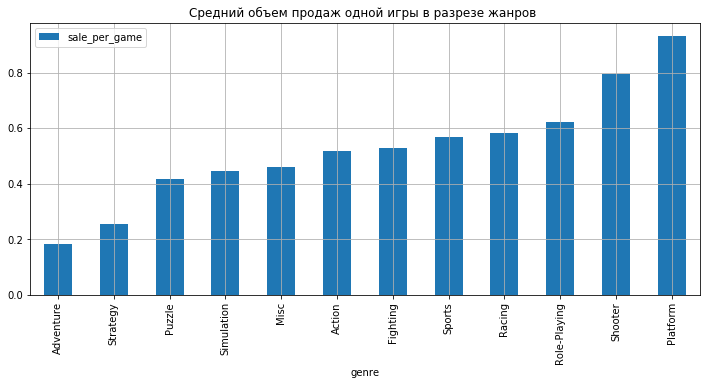

In [69]:
df_genre.sort_values(by='sale_per_game',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='sale_per_game')
plt.title('Средний объем продаж одной игры в разрезе жанров ')

За весь предоставленный период больше всего игр в жанрах Спорт и Экшен. Если смотреть средний объем продаж одной игры в разре жанра, то здесь лидируют шутеры и платформы. По-большей роли это связано со старыми играми, которые пользовались колоссальной популярностью. Далее мы расмотрим данные показатели за период с 2010 года, чтобы понять, какие жанры популярны сейчас.


In [70]:
df_genre_sales_new = df.query('year_of_release >=2010').groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [71]:
df_genre_new = df.query('year_of_release >=2010').groupby(['genre']).agg('count').reset_index()

In [72]:
df_genre_new = df_genre_new[['genre','name']]
df_genre_new = df_genre_new.merge(df_genre_sales_new, on='genre') 
df_genre_new.columns =['genre','count','total_sales']
df_genre_new['sale_per_game'] = df_genre_new['total_sales'] / df_genre_new['count']

In [73]:
df_genre_new.sort_values(by='sale_per_game',ascending=False)

,genre,count,total_sales,sale_per_game
8,Shooter,417,482.22,1.156403
4,Platform,153,119.72,0.782484
10,Sports,578,329.43,0.569948
7,Role-Playing,569,315.33,0.554183
6,Racing,237,122.68,0.517637
0,Action,1514,680.68,0.449590
2,Fighting,199,81.59,0.410000
3,Misc,583,235.05,0.403173
9,Simulation,218,72.05,0.330505
11,Strategy,173,36.36,0.210173


Text(0.5, 1.0, 'Объем продаж по жанрам')

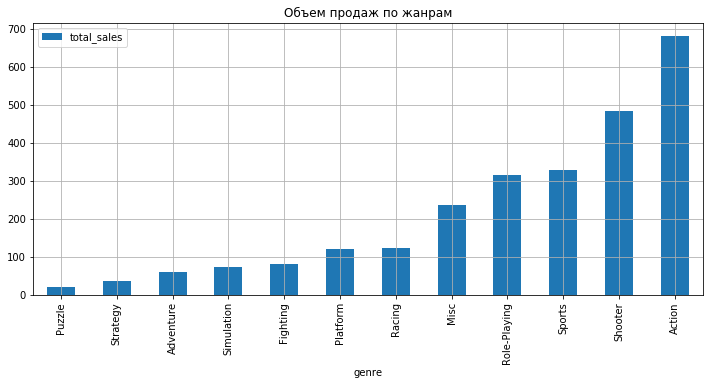

In [74]:
df_genre_new.sort_values(by='total_sales',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='total_sales')
plt.title('Объем продаж по жанрам')

Text(0.5, 1.0, 'Количество игр по жанрам')

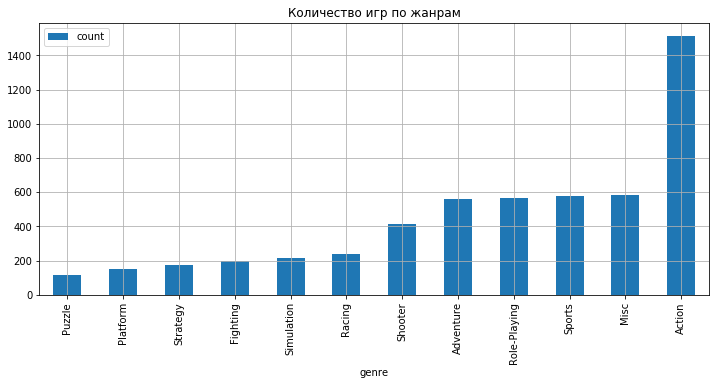

In [75]:
df_genre_new.sort_values(by='count',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='count')
plt.title('Количество игр по жанрам')

Text(0.5, 1.0, 'Средний объем продаж одной игры в разрезе жанров ')

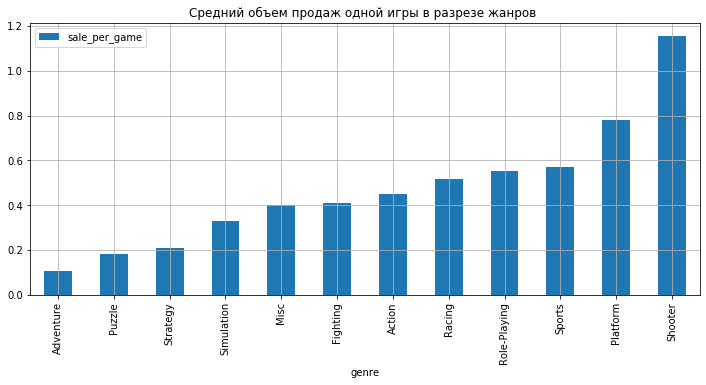

In [76]:
df_genre_new.sort_values(by='sale_per_game',ascending=True).plot(grid=True, figsize=(12, 5), kind='bar',x='genre',y='sale_per_game')
plt.title('Средний объем продаж одной игры в разрезе жанров ')

Как видно, рейтинг жанров немного поменялся с 2010 года. По среднему объему продаж лидируют шутеры, по количеству игр и объему продаж - Экшены. Количество игр с жанром "Платформы" гораздо меньше. 

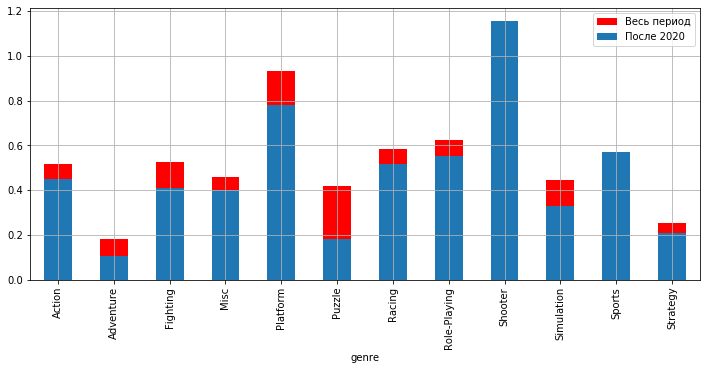

In [77]:
ax = df_genre.plot(kind='bar',y='sale_per_game',color='red')
df_genre_new.plot(ax=ax,kind='bar',x='genre',y='sale_per_game',grid=True, figsize=(12, 5))
ax.legend(('Весь период', 'После 2020'))

Как видно, практически по всем жанрам кроме шутеров и спорта, среднее количество продаж на одну игру упало. 

## Шаг 4. Составим портрет пользователя каждого региона. <a id='step4'></a>

Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
 - Самые популярные жанры (топ-5). Поясните разницу.
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [78]:
df1 = df.query('year_of_release >= 2013').groupby('platform')['na_sales'].sum().sort_values(ascending=False)
df2 = df.query('year_of_release >= 2013').groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
df3 = df.query('year_of_release >= 2013').groupby('platform')['jp_sales'].sum().sort_values(ascending=False)


In [79]:
df1 = df1.to_frame().reset_index()
df2 = df2.to_frame().reset_index()
df3 = df3.to_frame().reset_index()

In [80]:
df_region = df1.merge(df2, on='platform') 
df_region = df_region.merge(df3, on='platform') 

In [81]:
df_region

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,0.34
2,X360,81.66,42.52,0.51
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81
5,WiiU,29.21,19.85,10.88
6,PC,11.19,25.84,0.00
7,Wii,6.56,5.93,0.05
8,PSV,5.04,6.10,18.59
9,DS,0.57,0.85,0.00


In [82]:
df_region_na_sales = df_region.head(5)
df_region_eu_sales = df_region.sort_values(by='eu_sales', ascending=False).head(5)
df_region_jp_sales = df_region.sort_values(by='jp_sales', ascending=False).head(5)

In [83]:
df_region_na_sales

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,0.34
2,X360,81.66,42.52,0.51
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81


In [84]:
df_region_eu_sales

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
3,PS3,63.50,67.81,23.35
1,XOne,93.12,51.59,0.34
2,X360,81.66,42.52,0.51
4,3DS,38.20,30.96,67.81


Text(0.5, 0.98, 'Популярные игры в NA')

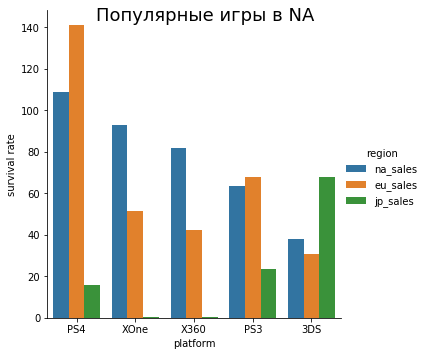

In [85]:
df_region_na_sales = pd.melt(df_region_na_sales, id_vars="platform", var_name="region", value_name="survival rate")
sns.factorplot(x='platform', y='survival rate', hue='region', data=df_region_na_sales, kind='bar').fig.suptitle('Популярные игры в NA', fontsize= 18)

Text(0.5, 0.98, 'Популярные игры в EU')

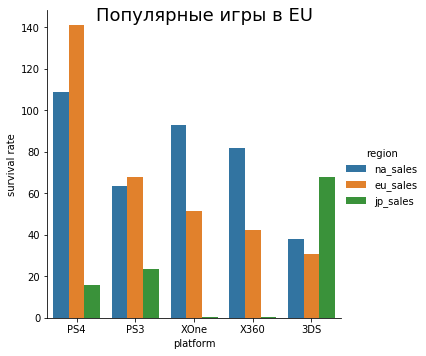

In [86]:
df_region_eu_sales = pd.melt(df_region_eu_sales, id_vars="platform", var_name="region", value_name="survival rate")
sns.factorplot(x='platform', y='survival rate', hue='region', data=df_region_eu_sales, kind='bar').fig.suptitle('Популярные игры в EU', fontsize= 18)

Text(0.5, 0.98, 'Популярные игры в JP')

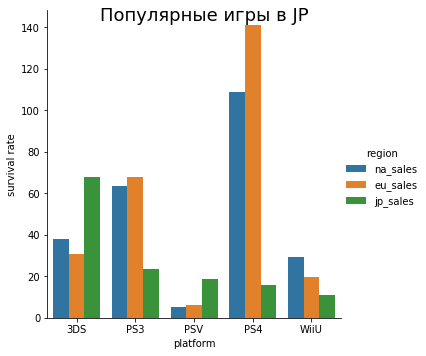

In [87]:
df_region_jp_sales = pd.melt(df_region_jp_sales, id_vars="platform", var_name="region", value_name="survival rate")
sns.factorplot(x='platform', y='survival rate', hue='region', data=df_region_jp_sales, kind='bar').fig.suptitle('Популярные игры в JP', fontsize= 18)


Анализ популярности платформ показал, что их рейтинг отличается в зависимости от региона. Так например, в Северной Америке самым популярным считается X360, а в Японии этой платформы даже нет в топ-5.
В целом же картина в Европейском и Американском региона схожа в разрезе популярности платформ. В плане продаж здесь беспрекословно лидирует Америка.


Рассмотрим самые популярные жанры (топ-5).

In [88]:
df1 = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
df2 = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
df3 = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
df4 = df.groupby('genre')['other_sales'].sum().sort_values(ascending=False)


In [89]:
df1 = df1.to_frame().reset_index()
df2 = df2.to_frame().reset_index()
df3 = df3.to_frame().reset_index()
df4 = df4.to_frame().reset_index()

In [90]:
df_region_genre = df1.merge(df2, on='genre') 
df_region_genre = df_region_genre.merge(df3, on='genre') 
df_region_genre = df_region_genre.merge(df4, on='genre') 

In [91]:
df_region_genre

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,879.01,519.13,161.43,184.60
1,Sports,684.43,376.79,135.54,134.51
2,Shooter,592.24,317.34,38.76,104.11
3,Platform,445.50,200.35,130.83,51.09
4,Misc,407.27,212.74,108.11,74.39
5,Racing,359.35,236.51,56.71,76.10
6,Role-Playing,330.81,188.71,355.41,59.63
7,Fighting,223.36,100.33,87.48,36.36
8,Simulation,181.92,113.52,63.80,30.73
9,Puzzle,122.87,50.01,57.31,12.38


In [92]:
df_region_genre.sort_values(by='eu_sales', ascending = False)

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,879.01,519.13,161.43,184.60
1,Sports,684.43,376.79,135.54,134.51
2,Shooter,592.24,317.34,38.76,104.11
5,Racing,359.35,236.51,56.71,76.10
4,Misc,407.27,212.74,108.11,74.39
3,Platform,445.50,200.35,130.83,51.09
6,Role-Playing,330.81,188.71,355.41,59.63
8,Simulation,181.92,113.52,63.80,30.73
7,Fighting,223.36,100.33,87.48,36.36
10,Adventure,105.26,63.54,52.30,16.49


In [93]:
df_region_genre.sort_values(by='jp_sales', ascending = False)

,genre,na_sales,eu_sales,jp_sales,other_sales
6,Role-Playing,330.81,188.71,355.41,59.63
0,Action,879.01,519.13,161.43,184.60
1,Sports,684.43,376.79,135.54,134.51
3,Platform,445.50,200.35,130.83,51.09
4,Misc,407.27,212.74,108.11,74.39
7,Fighting,223.36,100.33,87.48,36.36
8,Simulation,181.92,113.52,63.80,30.73
9,Puzzle,122.87,50.01,57.31,12.38
5,Racing,359.35,236.51,56.71,76.10
10,Adventure,105.26,63.54,52.30,16.49


In [94]:
df_region_genre.sort_values(by='other_sales', ascending = False)

,genre,na_sales,eu_sales,jp_sales,other_sales
0,Action,879.01,519.13,161.43,184.60
1,Sports,684.43,376.79,135.54,134.51
2,Shooter,592.24,317.34,38.76,104.11
5,Racing,359.35,236.51,56.71,76.10
4,Misc,407.27,212.74,108.11,74.39
6,Role-Playing,330.81,188.71,355.41,59.63
3,Platform,445.50,200.35,130.83,51.09
7,Fighting,223.36,100.33,87.48,36.36
8,Simulation,181.92,113.52,63.80,30.73
10,Adventure,105.26,63.54,52.30,16.49


Предпочтения пользователей из разных регионов тоже отличаются - повторяется история и с платформами, где Японские пользователи выбирают чаще ролевые игры. Данный жанр в Америке и Европе пользуется меньшей популярностью. 
Рынки в разрезе регионов отличаются, и это важно учитывать.

Проверим влияет ли рейтинг ESRB на продажи в отдельном регионе?

Text(0.5, 1.0, 'Рейтинг в Америке')

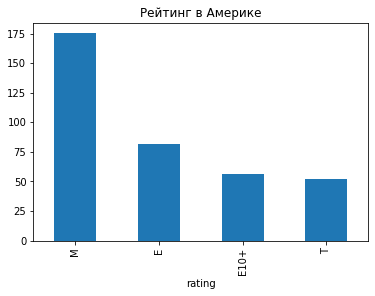

In [95]:
df.query('year_of_release >= 2013').groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Америке')

Text(0.5, 1.0, 'Рейтинг в Европе')

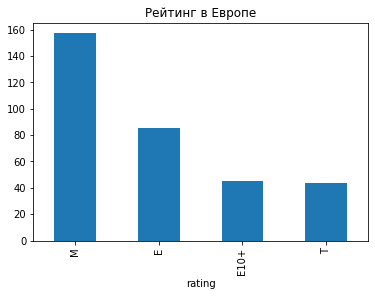

In [96]:
df.query('year_of_release >= 2013').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Европе')

Text(0.5, 1.0, 'Рейтинг в Японии')

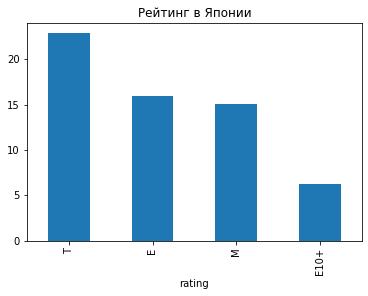

In [97]:
df.query('year_of_release >= 2013').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Японии')

Во всех регионах лидирует категория игр "Для всех". Следом идут игры для подростков 13-19 (T) и пользователям от 17 лет (М). В целом в этом нет ничего сверхестественного.

Проверим, гипотезу о том, что игры одного жанра соответствуют какому-либо определенному рейтингу.

In [98]:
df.groupby('genre')['rating'].value_counts()

genre         rating
Action        T          714
              M          655
              E10+       500
              E          449
              AO           1
              EC           1
Adventure     E          167
              T          124
              M          111
              E10+        70
              EC           2
Fighting      T          376
              M           56
              E10+        19
              E            8
Misc          E          476
              T          249
              E10+       168
              M           15
              EC           7
              K-A          1
Platform      E          377
              E10+       150
              T           65
              M            3
Puzzle        E          298
              E10+        43
              T           10
Racing        E          603
              T          183
              E10+       104
              M           18
              RP           1
Role-Playing  T       

Гипотеза неверна. Тогда заменим пропуски на "Without rating"

In [99]:
df['rating'] = df['rating'].fillna(value='Without rating')

In [100]:
df.groupby('genre')['rating'].value_counts().head(20)

genre      rating        
Action     Without rating    1049
           T                  714
           M                  655
           E10+               500
           E                  449
           AO                   1
           EC                   1
Adventure  Without rating     829
           E                  167
           T                  124
           M                  111
           E10+                70
           EC                   2
Fighting   Without rating     390
           T                  376
           M                   56
           E10+                19
           E                    8
Misc       Without rating     834
           E                  476
Name: rating, dtype: int64

Построим графики заново

Text(0.5, 1.0, 'Рейтинг в Америке')

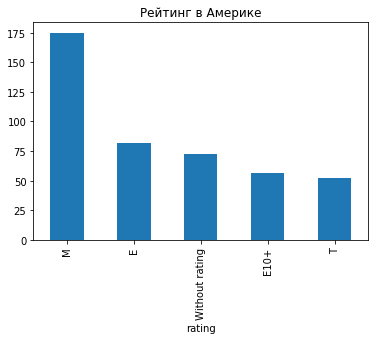

In [101]:
df.query('year_of_release >= 2013').groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Америке')

Text(0.5, 1.0, 'Рейтинг в Европе')

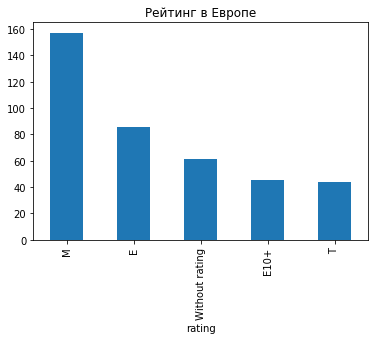

In [102]:
df.query('year_of_release >= 2013').groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Европе')

Text(0.5, 1.0, 'Рейтинг в Японии')

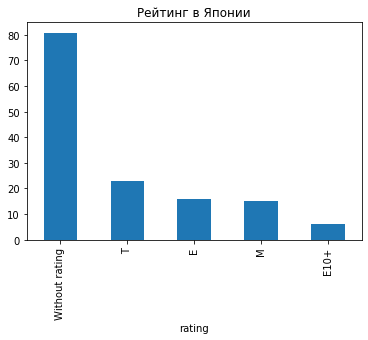

In [103]:
df.query('year_of_release >= 2013').groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Рейтинг в Японии')

## Шаг 5. Проверим гипотезы. <a id='step5'></a>

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Возьмем общепринятый уровень значимости - 5% (по 2,5% c каждой стороны). Сформируем гипотезы:
 - H0 - cредние пользовательские рейтинги платформ Xbox One и PC равны.
 - H1 - cредние пользовательские рейтинги платформ Xbox One и PC не равны.
 Так как сравниваемые выборки независимы между собой, будем использовать t-критерий Стьюдента.

In [104]:
xbox_one = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc = df[(df['platform'] != 'PC') & (df['user_score'] > 0)]['user_score']

In [105]:
np.var(xbox_one)/np.var(pc)

0.8496342447029627

Отношение дисперсий 15%. Также применим equal_var=False при проверки гипотезы.

In [106]:
alpha = 0.05
results = st.ttest_ind(xbox_one, pc, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу"),
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.7404123507995514e-08
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Возьмем общепринятый уровень значимости - 5% (по 2,5% c каждой стороны). Сформируем гипотезы:
- H0 - cредние пользовательские рейтинги жанров Action и Sport равны.
- H1 - cредние пользовательские рейтинги жанров Action и Sport не равны.


In [107]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sport = df[(df['genre'] != 'Sport') & (df['user_score'] > 0)]['user_score']

In [108]:
np.var(action)/np.var(sport)

0.9051893905310471

Отношение дисперсий 10%. Также применим equal_var=False при проверки гипотезы.

In [109]:
alpha = 0.05
results = st.ttest_ind(action, sport, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу"),
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.055123193508713975
Не получилось отвергнуть нулевую гипотезу


<p>Как итог - с большой долей вероятности можно утверждать, что средние пользовательские рейтинги платформы Xbox One и PC отличаются. </p>
<p>Полученное значение p-value говорит о том, что, с вероятностью в почти 5% cредние пользовательские рейтинги жанров Action и Sport могут быть не равными.</p>

## Шаг 6. Вывод. <a id='step6'></a>

Полученный датасет имел ряд ошибок, которые были исправлены во время работы: столбцы имели не тот формат, в строках были пропущенные значения. В процесс обработки данных мы испавили ошибки, и заполнили данные, где это было возможно.
Мы обратили внимание на столбец с Оценкой критиков, который отличался от оценки пользователей разрядом чисел (например 76 и 8). Возможно это тоже была ошибка, и следует разделить на 10 все значения в столбце с оценкой критиков, чтобы данные находились в одном диапазоне.
В процессе обработки данных удалось заполнить недостащие значения на основе предыдущих данных - например для игры FIFA 14 заполнен рейтинг и год почти на всех платформах, кроме одной. Логично, что мы заменили пропуски на ранее полученные значения (хотя потенциально имеем ввиду, что релиз игры на другой платформе мог случиться раньше или позже).

В целом, объем выпуска игр постепенно падает, начиная с 2008 года. Новые платформы пользуюутся популярностью примерно 5 лет, после чего появляются новые, и уже на них возникает повышенный спрос. Если строить прогноз на 2017 год, то стоит ожидать повышение спроса на PS4 и XOne.
Пользователи предпочитают Шутеры, Экшены и спортивные жанры. Наиболее прибыльный жанр - шутеры, поэтому если вы хотите поднять денег, то создавайте шутер. Кроме этого, на общий объем продаж игр влияют реальные отзывы критиков. Стоит это тоже принять во внимание.
Если рассматривать географию пользователей, то тут тоже есть свою ньюансы. Выборка пользователей из Америки и Европы более-менее схожа, но зато сильно отличается от Японцев, у которых свои культурные интересы (ролевые игры).